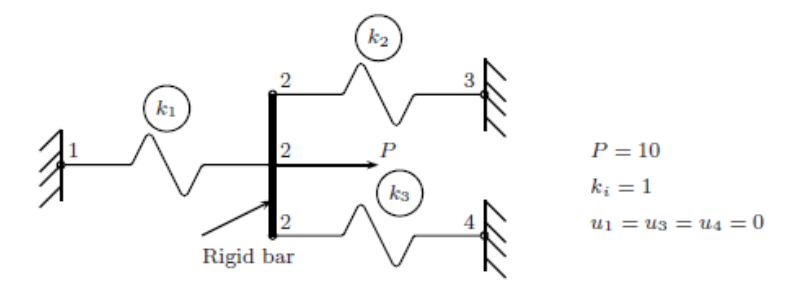

'Global stiffness Matrix:'

⎡k₁       -k₁        0    0 ⎤
⎢                           ⎥
⎢-k₁  k₁ + k₂ + k₃  -k₂  -k₃⎥
⎢                           ⎥
⎢ 0       -k₂       k₂    0 ⎥
⎢                           ⎥
⎣ 0       -k₃        0   k₃ ⎦

'Displacement at nodes:'

⎡       0        ⎤
⎢                ⎥
⎢3.33333333333333⎥
⎢                ⎥
⎢       0        ⎥
⎢                ⎥
⎣       0        ⎦

In [1]:
import sympy as sp
import numpy as np
from sympy import Matrix, symbols, Symbol, zeros, init_printing, N
from IPython.display import Image
display(Image("q1.png"))
init_printing(pretty_print = True)
#This function converts very small values to 0. This is the best piece of code here.
def reduce(mat): return Matrix(mat.shape[0], mat.shape[1], lambda i,j: 0 if abs(mat[i]) < 0.000001 else mat[i])

# Expand element stiffnesses to have same shape as global stiffness
k1, k2, k3 = symbols('k1 k2 k3')
K1 = Matrix(4, 4, lambda i,j: 0)
K1[0:2, 0:2] = Matrix(2, 2, lambda i,j: k1 if i==j else -k1)
K2 = Matrix(4, 4, lambda i,j: 0)
K2[1:3, 1:3] = Matrix(2, 2, lambda i,j: k2 if i==j else -k2)
K3 = Matrix(4, 4, lambda i,j: 0)
K3[1, :] = Matrix(1,4,[0,k3, 0, -k3])
K3[3, :] = Matrix(1,4,[0,-k3, 0, k3])
#display(K1,K2,K3)
Kg = K1 + K2 + K3
display('Global stiffness Matrix:',Kg)

# Apply boundary conditions by setting appropriate components of K
K = Matrix(Kg)
X = 1.E+30
K[0,0] = X
K[2,2] = X
K[3,3] = X

# Form the force array F. f1 & f3 are unknown reaction forces.
P = symbols('P')
F = Matrix(4, 1, [0, P, 0, 0])

# Solve for displacements.
u = K.LUsolve(F)

# Susbstituting real values
subs = {k1: 1, k2: 1, k3:1, P: 10}
usol = N(u.subs(subs))
display('Displacement at nodes:',reduce(usol))

'''
#Solve for reactions by back substituting u in to the global equations
react = Kg * u - F
rsol = react.subs(subs)
display(rsol)
'''
print()